# ------------------------  Multiple Linear Regression  ---------------------------

### Assignment Task:

#### Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.

### Dataset Description:

The dataset consists of the following variables:

* Age: Age in years
* KM: Accumulated Kilometers on odometer
* FuelType: Fuel Type (Petrol, Diesel, CNG)
* HP: Horse Power
* Automatic: Automatic (Yes=1, No=0)
* CC: Cylinder Volume in cubic centimeters
* Doors: Number of doors
* Weight: Weight in Kilograms
* Quarterly_Tax:
* Price: Offer Price in EUROs

### Tasks:

1. Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.
2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.
4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5. Apply Lasso and Ridge methods on the model.

### Interview Questions:
1. What is Normalization & Standardization and how is it helpful?
2. What techniques can be used to address multicollinearity in multiple linear regression?

* Ensure to properly comment your code and provide explanations for your analysis.
* Include any assumptions made during the analysis and discuss their implications.

### Loading Dataset and important python libraries

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

data=pd.read_csv('ToyotaCorolla - MLR.csv')
data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [277]:
data.shape

(1436, 11)

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [279]:
# Since there is no non-null value hence we can proceed ahead without adjusting the data.

In [280]:
data.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [281]:
# Drop the 'Fuel_Type' column as it is not numerical and cannot be used for correlation calculation.

data_numerical = data.drop('Fuel_Type', axis=1)
data_numerical.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


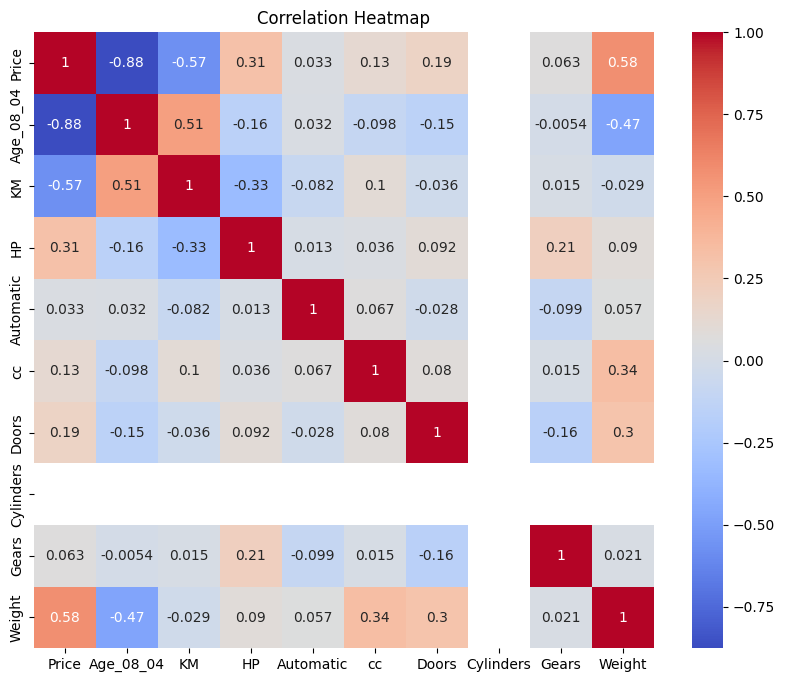

In [282]:
plt.figure(figsize=(10, 8))
sns.heatmap(data_numerical.corr(), annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### 1. Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre-process the data to apply the MLR.

#### Exploring Numerical Variables using Histogram

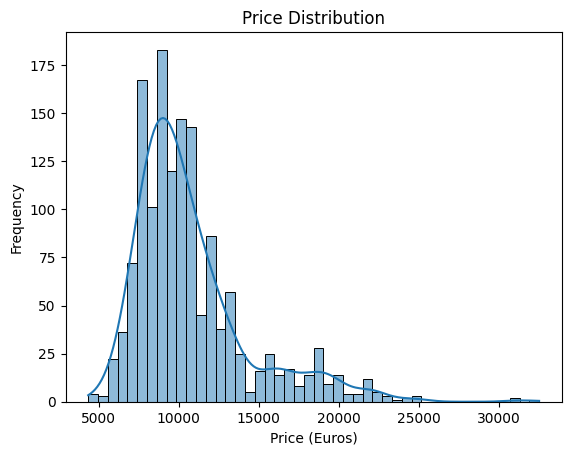

In [283]:
sns.histplot(data['Price'],kde=True)
plt.title('Price Distribution')
plt.xlabel('Price (Euros)')
plt.ylabel('Frequency')
plt.show()

Price:
* The distribution of 'Price' is right-skewed, indicating that a majority of the cars are in the lower to mid-price range, with fewer cars at higher prices.

* Has few outliers in the plot where the price is on the extreme higher cost.

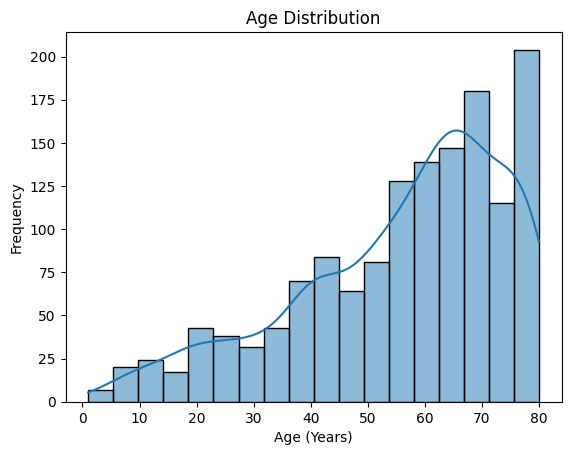

In [284]:
sns.histplot(data['Age_08_04'],kde=True)
plt.title('Age Distribution')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

Age_08_04:
* The 'Age_08_04' distribution appears to be left-skewed, suggesting that most of the cars in the dataset are older, with very fewer newer cars.

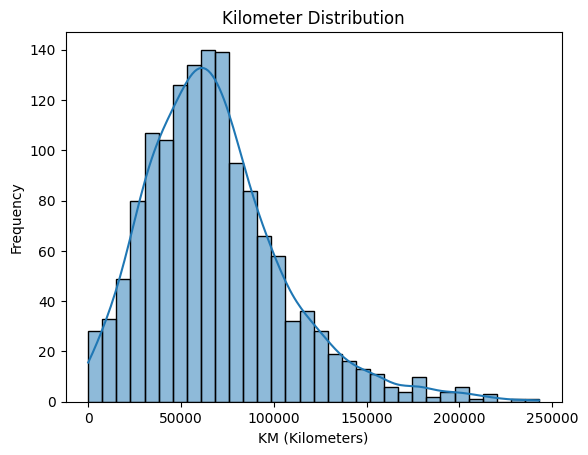

In [285]:
sns.histplot(data['KM'],kde=True)
plt.title('Kilometer Distribution')
plt.xlabel('KM (Kilometers)')
plt.ylabel('Frequency')
plt.show()

KM:
* The 'KM' (accumulated kilometers) distribution is also right-skewed, showing that many cars have lower mileage, and fewer have very high mileage.

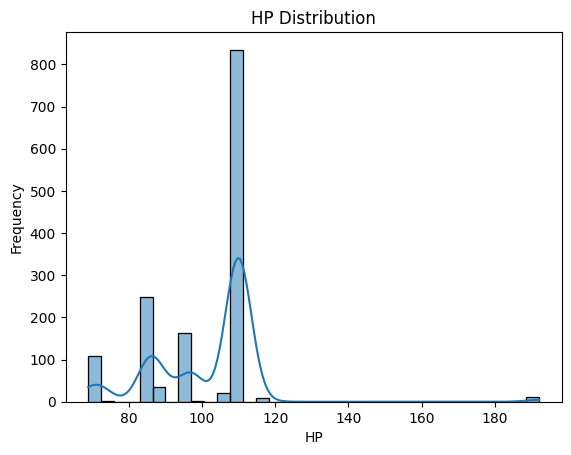

In [286]:
sns.histplot(data['HP'],kde=True)
plt.title('HP Distribution')
plt.xlabel('HP')
plt.ylabel('Frequency')
plt.show()

HP:
* For the 'HP' (Horse Power) variable, the histogram shows a distribution (right skewed) where a significant number of cars have HP values concentrated around 90 to 110. There's a tail extending to higher HP values, indicating fewer cars with very high horsepower.

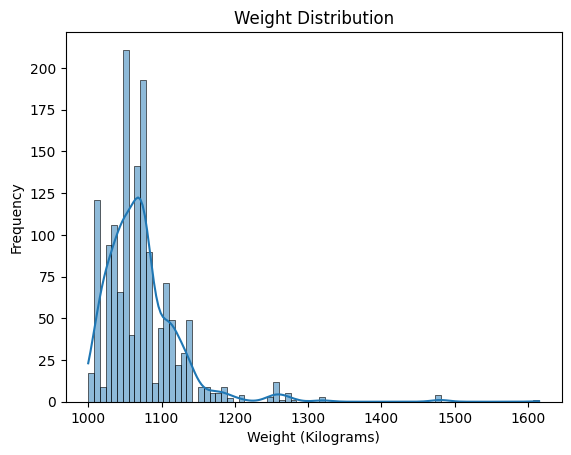

In [287]:
sns.histplot(data['Weight'],kde=True)
plt.title('Weight Distribution')
plt.xlabel('Weight (Kilograms)')
plt.ylabel('Frequency')
plt.show()

Weight:
* It shows a distribution that is relatively symmetrical and concentrated around lower side. The majority of the cars fall within a weight range of approximately 1000 kg to 1100 kg. It indicates that most vehicles have weights very close to this average, with fewer cars at the higher end of the weight spectrum (up to 1600 kg).

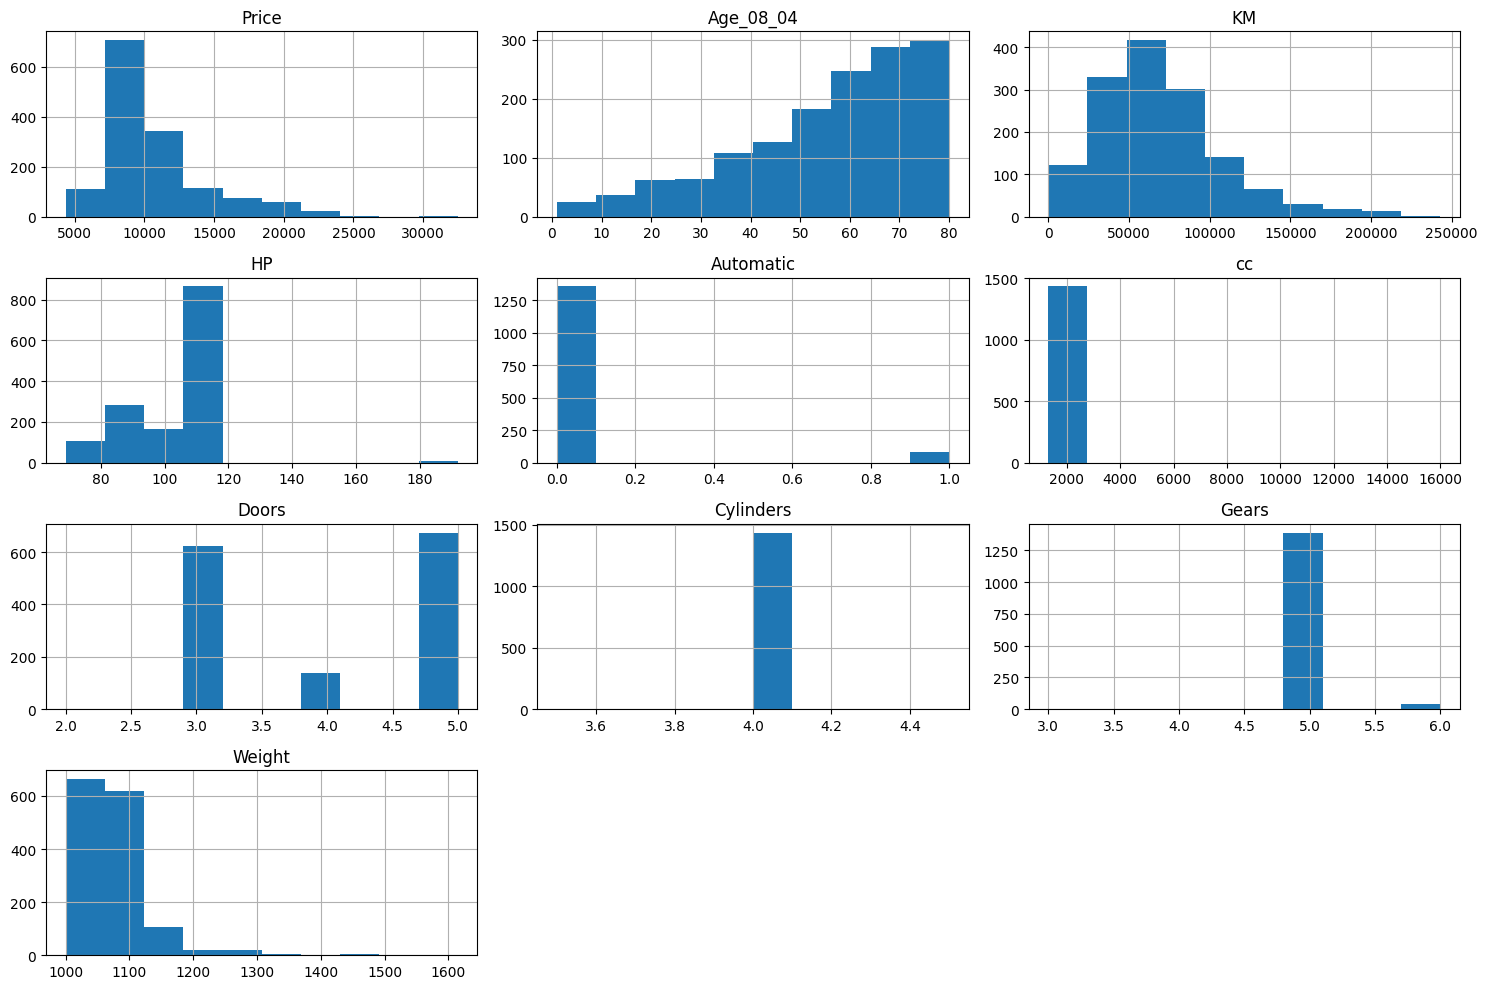

In [288]:
data.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

Other Numerical Features:
- The data.hist() output provides a quick overview of the distributions for other numerical features like 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', and 'Weight'.
- Most of these also show varying degrees of skewness or concentration around specific values.
- For instance, 'Cylinders' has only one value (4), which makes it a constant feature and not useful for regression.
- 'Doors' also has a limited number of distinct values.

#### Exploring Categorical Variable using Countplot

/tmp/ipython-input-1905313425.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x=data['Fuel_Type'],palette='plasma')


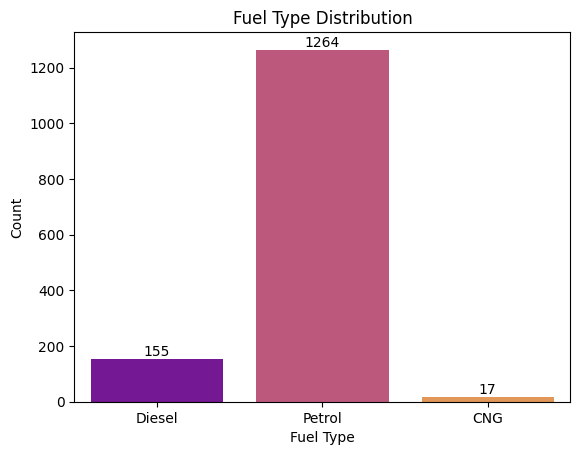

In [289]:
ax=sns.countplot(x=data['Fuel_Type'],palette='plasma')
for container in ax.containers:
    ax.bar_label(container,color='black')
plt.title('Fuel Type Distribution')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

Fuel_Type:
* As seen from the count plot, shows the distribution of different fuel types in the dataset.
* Typically, 'Petrol' cars are the most prevalent, followed by 'Diesel', with 'CNG' being the least common.
* This distribution indicates that the majority of the Toyota Corollas in this dataset run on gasoline, which is common in many markets.

#### Exploring visual relationshipd using Scatterplot - keeping price as target variable

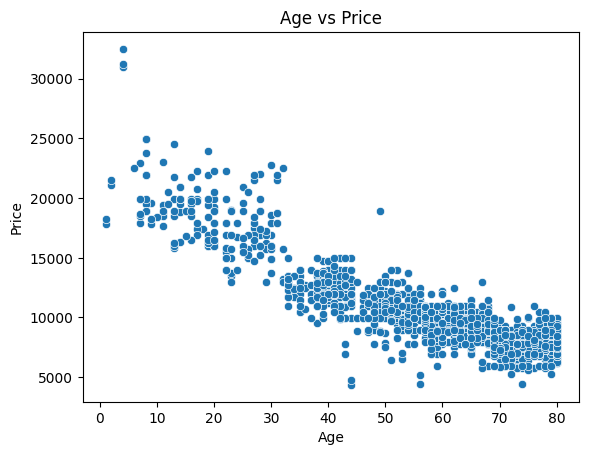

In [290]:
sns.scatterplot(x=data['Age_08_04'],y=data['Price'])
plt.title('Age vs Price')
plt.xlabel('Age')
plt.ylabel('Price')
plt.show()

Age vs. Price:
* The scatter plot of 'Age' against 'Price' shows a strong negative linear relationship. As the age of the car increases, its price generally decreases significantly.

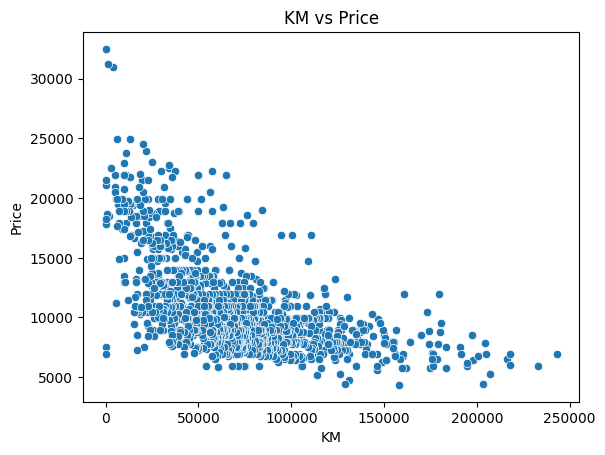

In [291]:
sns.scatterplot(x=data['KM'],y=data['Price'])
plt.title('KM vs Price')
plt.xlabel('KM')
plt.ylabel('Price')
plt.show()

KM vs. Price:
* The scatter plot for 'KM' against 'Price' also indicates a negative relationship, though it appears less strong than with age. As accumulated kilometers increase, the price of the car tends to decrease.

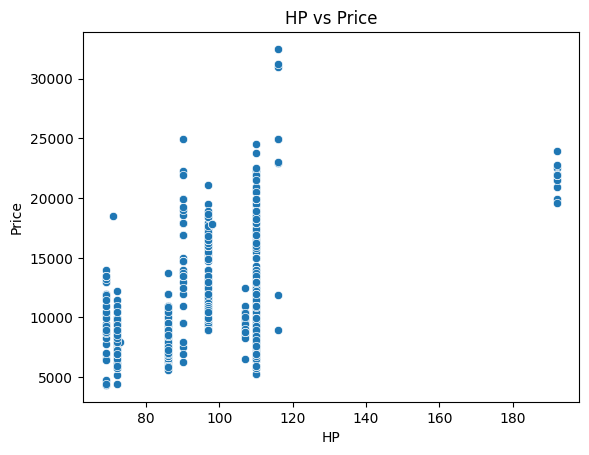

In [292]:
sns.scatterplot(x=data['HP'],y=data['Price'])
plt.title('HP vs Price')
plt.xlabel('HP')
plt.ylabel('Price')
plt.show()

HP vs. Price:
* The plot of 'HP' (Horse Power) against 'Price' suggests a positive, albeit moderate, relationship. Cars with higher horsepower tend to have higher prices.

<function matplotlib.pyplot.show(close=None, block=None)>

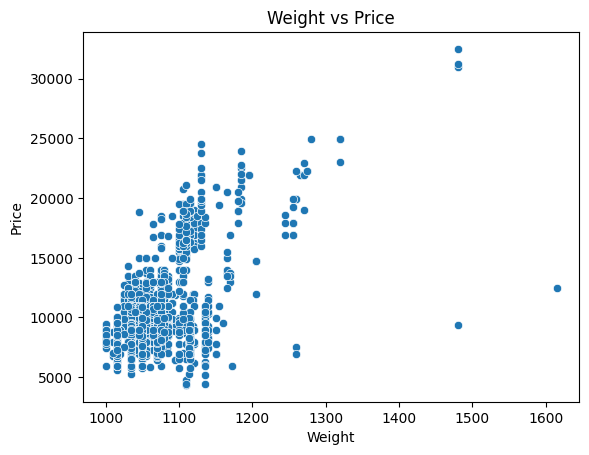

In [293]:
sns.scatterplot(x=data['Weight'],y=data['Price'])
plt.title('Weight vs Price')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.show

Weight vs. Price:
* The scatter plot for 'Weight' against 'Price' shows a moderate to strong positive linear relationship. Heavier cars generally command higher prices.

### 2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing). - Data Preprocessing

In [294]:
# Identifying Categorical and Numeric Value

cat_cols=['Fuel_Type']
num_cols=[col for col in data.columns if col not in cat_cols + ['Price']]

In [295]:
# One-Hot encoding for categorical variables

data=pd.get_dummies(data,columns=cat_cols,drop_first=True)


In [296]:
# Define X and y

X=data.drop('Price',axis=1)
y=data['Price']

In [297]:
# Train-Test split (80/20)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print('='*50)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print('='*50)

X_train shape: (1148, 11)
X_test shape: (288, 11)


### 3. Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build a minimum of 3 different models.

* Model 1 - Basic MLR
* Model 2 - Feature Selection via p-value proxy (Correlation)
* Model 3 - Top Correlated Numeric Features

### 4. Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

* ***Model 1 - Basic MLR***

In [298]:
# Fitting Model

model1_lr=LinearRegression()
model1_lr.fit(X_train,y_train)

LinearRegression()

In [299]:
y_pred1=model1_lr.predict(X_test)

In [300]:
# Evaluating the model

mae1=mean_absolute_error(y_test,y_pred1)
mse1=mean_squared_error(y_test,y_pred1)
rmse1=np.sqrt(mse1)
r2_score1=r2_score(y_test,y_pred1)

print('='*60)
print(f'MAE (Mean Absolute Error)_1: {mae1}')
print(f'MSE (Mean Squared Error)_1: {mse1}')
print(f'RMSE (Root Mean Squared Error)_1: {rmse1}')
print(f'R2 Score_1: {r2_score1}')
print('='*60)

MAE (Mean Absolute Error)_1: 990.8872739193926
MSE (Mean Squared Error)_1: 2203043.8231437025
RMSE (Root Mean Squared Error)_1: 1484.2654153296514
R2 Score_1: 0.8348888040611082


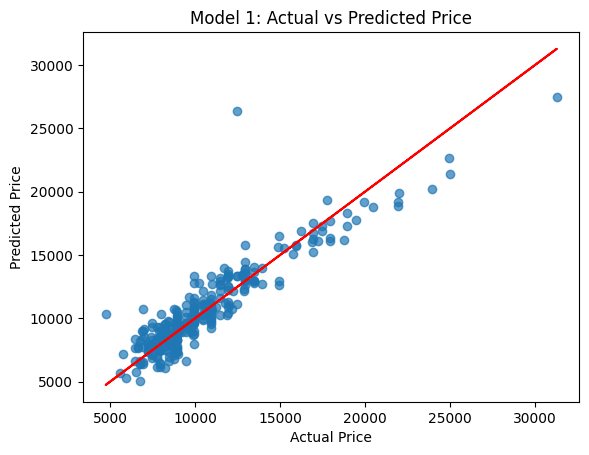

In [301]:
# Visualization of the model

plt.scatter(y_test,y_pred1,alpha=0.7)
plt.plot(y_test,y_test,'r')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 1: Actual vs Predicted Price')
plt.show()

##### Model 1:

The 'Actual vs Predicted Price' scatter plot visually represents the performance of the first Multiple Linear Regression model.

In this plot:

- The x-axis shows the actual prices (y_test).
- The y-axis shows the prices predicted by the model (y_pred1).
- The red diagonal line represents the ideal scenario where predicted prices perfectly match actual prices.

- From the visualization, we can observe that the data points (each representing a car's actual and predicted price) are generally clustered closely around the red diagonal line. This indicates that the model is making reasonably accurate predictions across a wide range of prices.
- However, there might be some scatter, especially at the extremes of the price range, suggesting areas where the model's predictions deviate more from the actual values.
- Overall, the plot supports the R2 score, showing a good fit for the model.

* ***Model 2 - Feature Selection via p-value proxy (Correlation)***

In [302]:
# Correlation with price

corr=data.corr(numeric_only=True)['Price'].abs().sort_values(ascending=False)

In [303]:
# Keeping only features that have correlation > 0.3

selected_feature=corr[corr>0.3].index.drop('Price')

print('='*100)
print(f'Selected Features (corr > 0.3): {selected_feature}')
print('='*100)

Selected Features (corr > 0.3): Index(['Age_08_04', 'Weight', 'KM', 'HP'], dtype='object')


In [304]:
# Training and testing the model

X_train_sf1=X_train[selected_feature]
X_test_sf1=X_test[selected_feature]


# Fitting the model

model2_lr=LinearRegression()
model2_lr.fit(X_train_sf1,y_train)

LinearRegression()

In [305]:
y_pred2=model2_lr.predict(X_test_sf1)

In [306]:
# Evaluating the model

mae2=mean_absolute_error(y_test,y_pred2)
mse2=mean_squared_error(y_test,y_pred2)
rsme2=np.sqrt(mse2)
r2_score2=r2_score(y_test,y_pred2)

print('='*60)
print(f'MAE (Mean Absolute Error)_2: {mae2}')
print(f'MSE (Mean Squared Error)_2: {mse2}')
print(f'RMSE (Root Mean Squared Error)_2: {rsme2}')
print(f'R2 Score_2: {r2_score2}')
print('='*60)

MAE (Mean Absolute Error)_2: 1001.201746605359
MSE (Mean Squared Error)_2: 1993321.0129730823
RMSE (Root Mean Squared Error)_2: 1411.8502091132339
R2 Score_2: 0.8506068681500574


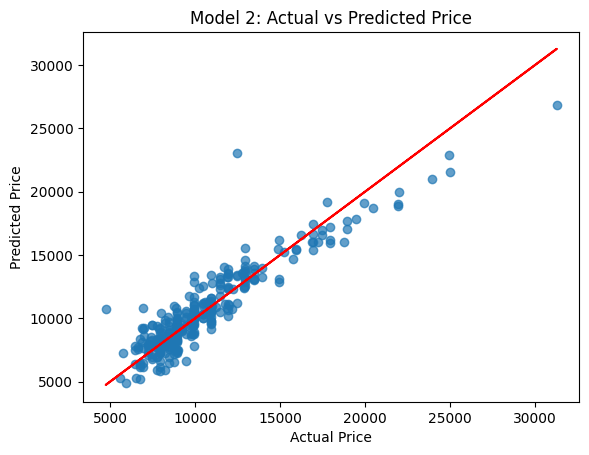

In [307]:
# Visualizing the model

plt.scatter(y_test,y_pred2,alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 2: Actual vs Predicted Price')
plt.plot(y_test,y_test,'r')
plt.show()

##### Model 2:

Actual vs Predicted Price' scatter plot is very similar to Model 1's visualization but reflects the performance of the second Multiple Linear Regression model, which uses a selected subset of features (Age_08_04, Weight, KM, HP).

- The x-axis displays the actual prices (y_test).
- The y-axis shows the prices predicted by Model 2 (y_pred2).
- The red diagonal line again represents the perfect prediction scenario where actual and predicted values are identical.

- Like Model 1, the data points generally cluster closely around this red diagonal line, indicating that Model 2 also makes reasonably accurate predictions.

- The scatter appears to be slightly tighter around the line compared to Model 1, especially given that Model 2 has a slightly higher R2 score (0.8506). This suggests a marginal improvement in how well the predicted prices align with the actual prices, particularly noticeable in the spread of predictions.



* ***Model 3 - Top Correlated Numeric Features***

In [308]:
# Top correlated numeric predictors

top_features=corr.index[1:8] # skip the price

print('='*120)
print(f'Top Correlated Numeric Features: {top_features}')
print('='*120)

Top Correlated Numeric Features: Index(['Age_08_04', 'Weight', 'KM', 'HP', 'Doors', 'cc', 'Gears'], dtype='object')


In [309]:
# Training and testing the model

X_train_top=X_train[top_features]
X_test_top=X_test[top_features]

# Fitting the model

model3_lr=LinearRegression()
model3_lr.fit(X_train_top,y_train)

LinearRegression()

In [310]:
y_pred3=model3_lr.predict(X_test_top)

In [311]:
# Evaluating the model

mse3=mean_squared_error(y_test,y_pred3)
mae3=mean_absolute_error(y_test,y_pred3)
rsme3=np.sqrt(mse3)
r2_score3=r2_score(y_test,y_pred3)

print('='*60)
print(f'MAE (Mean Absolute Error)_3: {mae3}')
print(f'MSE (Mean Squared Error)_3: {mse3}')
print(f'RMSE (Root Mean Squared Error)_3: {rsme3}')
print(f'R2 Score_3: {r2_score3}')
print('='*60)

MAE (Mean Absolute Error)_3: 995.9885810012274
MSE (Mean Squared Error)_3: 1978740.4736284507
RMSE (Root Mean Squared Error)_3: 1406.6771035416944
R2 Score_3: 0.85169963365174


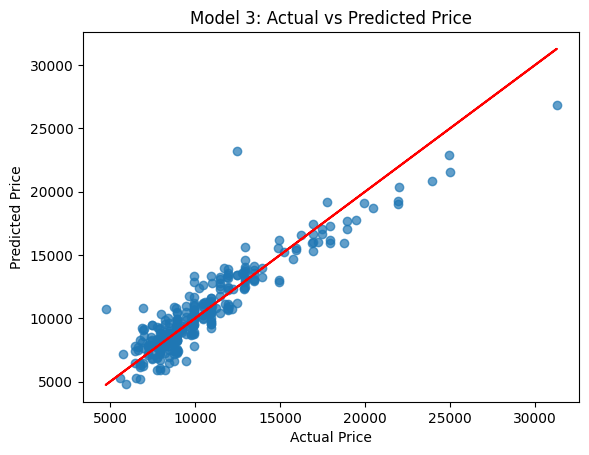

In [312]:
# Visualizing the model

plt.scatter(y_test,y_pred3,alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Model 3: Actual vs Predicted Price')
plt.plot(y_test,y_test,'r')
plt.show()

Model 3:

- Actual vs Predicted Price' scatter plot visually represents the performance of the third Multiple Linear Regression model, which uses a specific set of top-correlated numeric features. Like the previous models:

- The x-axis shows the actual prices (y_test).
- The y-axis shows the prices predicted by Model 3 (y_pred3).
- The red diagonal line indicates the ideal scenario where predicted prices perfectly match actual prices.

- The data points generally cluster closely around this red diagonal line, signifying that Model 3 also provides reasonably accurate predictions.

- Given its slightly higher R2 score (0.8517) compared to Model 1 and Model 2, the plot visually suggests a very slightly tighter fit of predicted values to actual values, indicating a minor improvement in predictive power.



### 4. Apply Lasso and Ridge methods on the model.

* Lasso Regression

In [313]:
# Scale Feature

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [314]:
# Using Lasso Regression Models

lasso_model=LassoCV(alphas=np.logspace(-2,4,100),cv=5, random_state=42)
lasso_model.fit(X_train_scaled,y_train)

LassoCV(alphas=array([1.00000000e-02, 1.14975700e-02, 1.32194115e-02, 1.51991108e-02,
       1.74752840e-02, 2.00923300e-02, 2.31012970e-02, 2.65608778e-02,
       3.05385551e-02, 3.51119173e-02, 4.03701726e-02, 4.64158883e-02,
       5.33669923e-02, 6.13590727e-02, 7.05480231e-02, 8.11130831e-02,
       9.32603347e-02, 1.07226722e-01, 1.23284674e-01, 1.41747416e-01,
       1.62975083e-01, 1.87381742e-0...
       4.03701726e+02, 4.64158883e+02, 5.33669923e+02, 6.13590727e+02,
       7.05480231e+02, 8.11130831e+02, 9.32603347e+02, 1.07226722e+03,
       1.23284674e+03, 1.41747416e+03, 1.62975083e+03, 1.87381742e+03,
       2.15443469e+03, 2.47707636e+03, 2.84803587e+03, 3.27454916e+03,
       3.76493581e+03, 4.32876128e+03, 4.97702356e+03, 5.72236766e+03,
       6.57933225e+03, 7.56463328e+03, 8.69749003e+03, 1.00000000e+04]),
        cv=5, random_state=42)

In [315]:
y_pred_lasso=lasso_model.predict(X_test_scaled)

In [316]:
# Evaluating the model

mse_lasso=mean_squared_error(y_test,y_pred_lasso)
mae_lasso=mean_absolute_error(y_test,y_pred_lasso)
rsme_lasso=np.sqrt(mse_lasso)
r2_score_lasso=r2_score(y_test,y_pred_lasso)


print('='*60)
print(f'MAE (Mean Absolute Error)_Lasso: {mae_lasso}')
print(f'MSE (Mean Squared Error)_Lasso: {mse_lasso}')
print(f'RMSE (Root Mean Squared Error)_Lasso: {rsme_lasso}')
print(f'R2 Score_Lasso: {r2_score_lasso}')
print('='*60)

MAE (Mean Absolute Error)_Lasso: 994.2352901478584
MSE (Mean Squared Error)_Lasso: 2100648.529386106
RMSE (Root Mean Squared Error)_Lasso: 1449.361421242509
R2 Score_Lasso: 0.8425630088287217


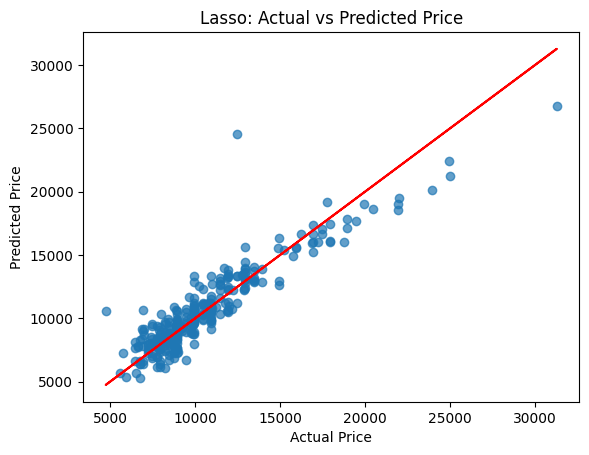

In [317]:
# Visualizing the model

plt.scatter(y_test,y_pred_lasso,alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Lasso: Actual vs Predicted Price')
plt.plot(y_test,y_test,'r')
plt.show()

The 'Lasso: Actual vs Predicted Price' scatter plot visually represents the performance of the Lasso regression model after scaling the features.

- The x-axis shows the actual prices (y_test).
- The y-axis shows the prices predicted by the Lasso model (y_pred_lasso).
- The red diagonal line indicates the ideal scenario where predicted prices perfectly match actual prices.
- Similar to the previous models, the data points generally cluster closely around the red diagonal line, indicating that the Lasso model also makes reasonably accurate predictions.

- The R2 score for the Lasso model (approximately 0.8426) is comparable to the initial MLR models. This suggests that while Lasso performs well, in this particular case, the regularization might not have drastically improved predictive accuracy compared to the unregularized MLR models, but it could have helped with feature selection or reducing overfitting by shrinking some coefficients towards zero.

* Ridge Regression

In [318]:
# Scale Feature

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [319]:
# Using Lasso Regression Models

ridge_model=RidgeCV(alphas=np.logspace(-2,4,100),cv=5)
ridge_model.fit(X_train_scaled,y_train)

RidgeCV(alphas=array([1.00000000e-02, 1.14975700e-02, 1.32194115e-02, 1.51991108e-02,
       1.74752840e-02, 2.00923300e-02, 2.31012970e-02, 2.65608778e-02,
       3.05385551e-02, 3.51119173e-02, 4.03701726e-02, 4.64158883e-02,
       5.33669923e-02, 6.13590727e-02, 7.05480231e-02, 8.11130831e-02,
       9.32603347e-02, 1.07226722e-01, 1.23284674e-01, 1.41747416e-01,
       1.62975083e-01, 1.87381742e-0...
       4.03701726e+02, 4.64158883e+02, 5.33669923e+02, 6.13590727e+02,
       7.05480231e+02, 8.11130831e+02, 9.32603347e+02, 1.07226722e+03,
       1.23284674e+03, 1.41747416e+03, 1.62975083e+03, 1.87381742e+03,
       2.15443469e+03, 2.47707636e+03, 2.84803587e+03, 3.27454916e+03,
       3.76493581e+03, 4.32876128e+03, 4.97702356e+03, 5.72236766e+03,
       6.57933225e+03, 7.56463328e+03, 8.69749003e+03, 1.00000000e+04]),
        cv=5)

In [320]:
y_pred_ridge=ridge_model.predict(X_test_scaled)

In [321]:
# Evaluating the model

mse_ridge=mean_squared_error(y_test,y_pred_ridge)
mae_ridge=mean_absolute_error(y_test,y_pred_ridge)
rsme_ridge=np.sqrt(mse_ridge)
r2_score_ridge=r2_score(y_test,y_pred_ridge)


print('='*60)
print(f'MAE (Mean Absolute Error)_Ridge: {mae_ridge}')
print(f'MSE (Mean Squared Error)_Ridge: {mse_ridge}')
print(f'RMSE (Root Mean Squared Error)_Ridge: {rsme_ridge}')
print(f'R2 Score_Ridge: {r2_score_ridge}')
print('='*60)

MAE (Mean Absolute Error)_Ridge: 992.5534376557197
MSE (Mean Squared Error)_Ridge: 2114719.5042788726
RMSE (Root Mean Squared Error)_Ridge: 1454.2075176118685
R2 Score_Ridge: 0.8415084335778057


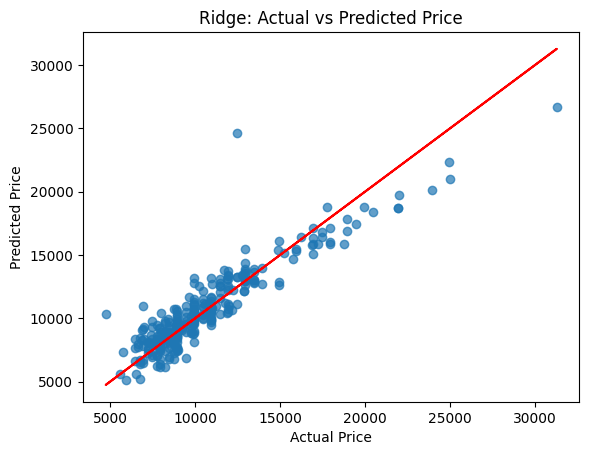

In [322]:
# Visualizing the model

plt.scatter(y_test,y_pred_ridge,alpha=0.7)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge: Actual vs Predicted Price')
plt.plot(y_test,y_test,'r')
plt.show()

The 'Ridge: Actual vs Predicted Price' scatter plot visually represents the performance of the Ridge regression model after scaling the features.

- The x-axis shows the actual prices (y_test).
- The y-axis shows the prices predicted by the Ridge model (y_pred_ridge).
- The red diagonal line indicates the ideal scenario where predicted prices perfectly match actual prices.

- Similar to the other models, the data points generally cluster closely around the red diagonal line, suggesting that the Ridge model also makes reasonably accurate predictions.

- The R2 score for the Ridge model (approximately 0.8415) is comparable to both the standard MLR models and the Lasso model. This indicates that Ridge regularization, while effective in preventing overfitting by shrinking coefficients, did not drastically change the overall predictive accuracy on this particular dataset compared to the other models tested.



# ------------------------------- SUMMARY -----------------------------------

In [323]:
# Summarizing the various findings

summary=pd.DataFrame({'Model':['Model 1 - Basic MLR','Model 2 - Correlations > 0.3','Model 3 - Top Correlation', 'Lasso Regression', 'Ridge Regression'],
                        'MAE':[mae1,mae2,mae3,mae_lasso,mae_ridge],
                        'MSE':[mse1,mse2,mse3,mse_lasso,mse_ridge],
                        'RMSE':[rmse1,rsme2,rsme3,rsme_lasso,rsme_ridge],
                        'R2 Score':[r2_score1,r2_score2,r2_score3,r2_score_lasso,r2_score_ridge]})


print('='*100)
print('\n Model Performance Summary')

print(summary.round(3))

print('='*100)


 Model Performance Summary
                          Model       MAE          MSE      RMSE  R2 Score
0           Model 1 - Basic MLR   990.887  2203043.823  1484.265     0.835
1  Model 2 - Correlations > 0.3  1001.202  1993321.013  1411.850     0.851
2     Model 3 - Top Correlation   995.989  1978740.474  1406.677     0.852
3              Lasso Regression   994.235  2100648.529  1449.361     0.843
4              Ridge Regression   992.553  2114719.504  1454.208     0.842


* Question:

1. What is Normalization & Standardization and how is it helpful?
2. What techniques can be used to address multicollinearity in multiple linear regression?

1. ANS: Both Normalization and Standardization are feature scaling techniques —
methods to transform numerical data so that all features contribute equally to model training.

    - When your data does not follow a Gaussian (normal) distribution

    - When you are using models that rely on distance metrics, like:

    - KNN (K-Nearest Neighbors)

    - K-Means Clustering

    - Neural Networks

- It is helpful when:

    - Ensures all features contribute equally to model training
    - Makes gradient descent converge faster
    - Prevents bias toward large-scale features
    - Improves model accuracy and stability
    - Essential before applying regularization (Lasso, Ridge)

2. ANS: Multicollinearity occurs when two or more independent variables (features) in a regression model are highly correlated with each other.

- Techniques

   - Remove Highly Correlated Predictors
   - Combine Variables
   - Principal Component Analysis
   - Regularization (Ridge or Lasso)
   - Center the data
   - Increase Sample Size
   - Domain Knowledge Fildering
